In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output
import threading
import DobotDllType as dType
import math
from sklearn.cluster import KMeans

In [79]:
# Open a connection to the default camera (usually the first camera device found)
cap1 = cv2.VideoCapture(0)

if not cap1.isOpened():
    print("Error: Could not open camera.")

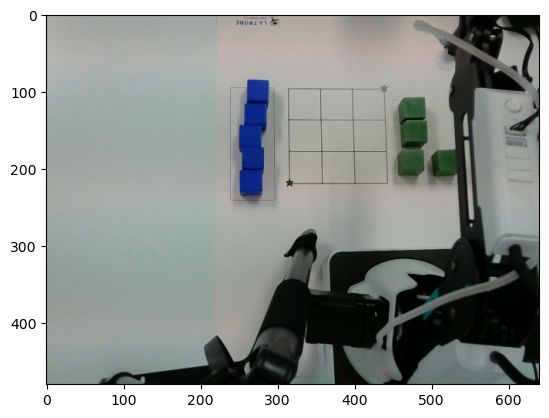

In [80]:
ret, frame1 = cap.read()
main_image1 = cv2.cvtColor(frame1, cv2.IMREAD_GRAYSCALE)
plt.imshow(main_image1)

In [2]:
# Open a connection to the default camera (usually the first camera device found)
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    print("Error: Could not open camera.")

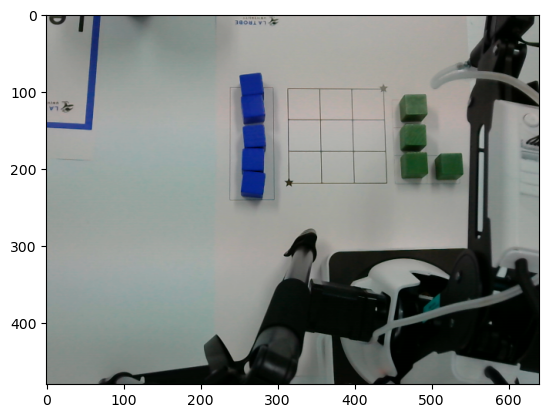

In [3]:
ret, frame = cap.read()
main_image = cv2.cvtColor(frame, cv2.IMREAD_GRAYSCALE)
plt.imshow(main_image)

## Template Matching

In [4]:
# Callback function to capture mouse events
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(f'Clicked at: x={x}, y={y}')
        # Optionally, display the clicked point on the image
        # font = cv2.FONT_HERSHEY_SIMPLEX
        # cv2.putText(main_image, f'{x},{y}', (x, y), font, 1, (255, 0, 0), 2, cv2.LINE_AA)
        # display_image(main_image)
        
# Function to display image using IPython display
def display_image(img):
    clear_output(wait=True)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

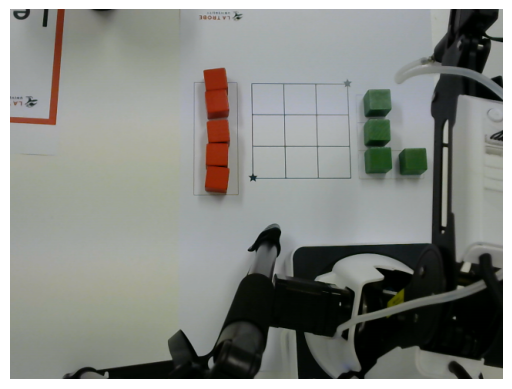

Clicked at: x=433, y=93


In [5]:
# Display the image
display_image(main_image)

# Set the mouse callback function to capture click events
cv2.namedWindow('image')
cv2.setMouseCallback('image', click_event)

# Use a loop to keep the window open for capturing events
while True:
    cv2.imshow('image', main_image)
    if cv2.waitKey(20) & 0xFF == 27:  # Exit on pressing 'ESC'
        break

cv2.destroyAllWindows()

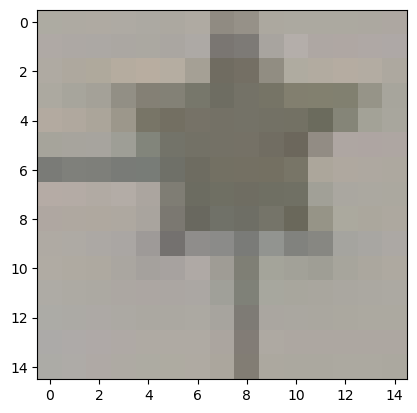

In [11]:
# Find the template from tbe image
template_pix_x = 91
template_pix_y = 430
template_size = 15

template = main_image[template_pix_x:template_pix_x+template_size, template_pix_y:template_pix_y+template_size]
plt.imshow(template)

In [12]:
# Perform template matching using cv2.matchTemplate
result = cv2.matchTemplate(main_image, template, cv2.TM_CCOEFF_NORMED)

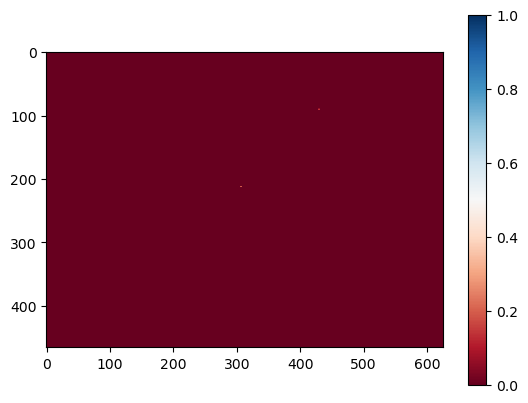

In [13]:
thresh = 0.8
result_filter = result >= thresh
plt.imshow(result_filter, cmap='RdBu')
plt.colorbar()

In [14]:
x, y = result_filter.shape
print(x,y)
pts = []
for i in range(x):
    for j in range(y):
        if result_filter[i,j] == 1:
            pts.append((j,i))

466 626


In [15]:
pts

[(430, 91), (307, 213)]

In [16]:
data = np.array(pts)

# Create a KMeans object with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the KMeans algorithm to the data
kmeans.fit(data)

# Get the coordinates of the centroids
centroids = kmeans.cluster_centers_

# Round the centroid coordinates to the nearest integer
centroids_rounded = np.rint(centroids).astype(int)
refImage = centroids_rounded[np.argsort(centroids_rounded[:, 0])]
print("Centroid coordinates (rounded to the nearest integer):")
print(refImage)

C:\Users\21361535\AppData\Local\anaconda3\envs\opencv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centroid coordinates (rounded to the nearest integer):
[[307 213]
 [430  91]]


C:\Users\21361535\AppData\Local\anaconda3\envs\opencv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [33]:
pos_cord = {}
pos_cord_tmp = {}
def gen_cord(pt1, pt2):
    x1, y1 = pt1[0], pt1[1]
    x2, y2 = pt2[0], pt2[1]

    middle_x, middle_y = (x1 + x2) / 2, (y1 + y2) / 2

    size = abs(x1 - x2) / 3

    pos_cord_tmp[1] = ( middle_x - size, middle_y - size )
    pos_cord_tmp[2] = ( middle_x,        middle_y - size )
    pos_cord_tmp[3] = ( middle_x + size, middle_y - size )
    pos_cord_tmp[4] = ( middle_x - size, middle_y )
    pos_cord_tmp[5] = ( middle_x,        middle_y )
    pos_cord_tmp[6] = ( middle_x + size, middle_y )
    pos_cord_tmp[7] = ( middle_x - size, middle_y + size )
    pos_cord_tmp[8] = ( middle_x,        middle_y + size)
    pos_cord_tmp[9] = ( middle_x + size, middle_y + size)

    pos_cord[1] = pos_cord_tmp[9] 
    pos_cord[2] = pos_cord_tmp[6]
    pos_cord[3] = pos_cord_tmp[3]
    pos_cord[4] = pos_cord_tmp[8]
    pos_cord[5] = pos_cord_tmp[5]
    pos_cord[6] = pos_cord_tmp[2]
    pos_cord[7] = pos_cord_tmp[7]
    pos_cord[8] = pos_cord_tmp[4]
    pos_cord[9] = pos_cord_tmp[1]

def draw_circle(img, x, y):
    img_cpy = img.copy()
    cv2.circle(img_cpy, (int(x), int(y)), 5, (0, 255, 0), -1)
    return img_cpy

In [34]:
pt1, pt2 = refImage[0] + int(template_size/2), refImage[1] + int(template_size/2)

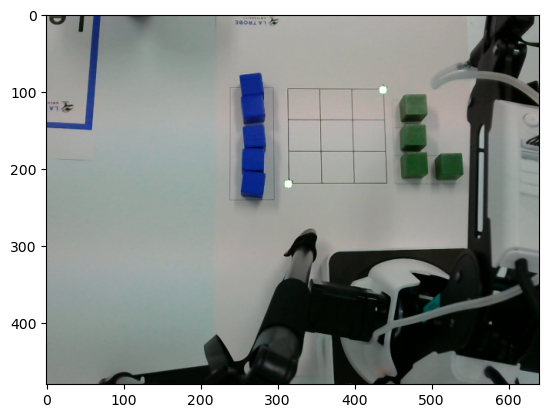

In [35]:
img_with_circles = main_image.copy()

img = draw_circle(img_with_circles, pt1[0], pt1[1])
img = draw_circle(img, pt2[0], pt2[1])

# for p in pts:
#     img[p[0],p[1]] = np.array([255,255,255,255])
plt.imshow(img)

In [37]:
gen_cord(pt1, pt2)

1


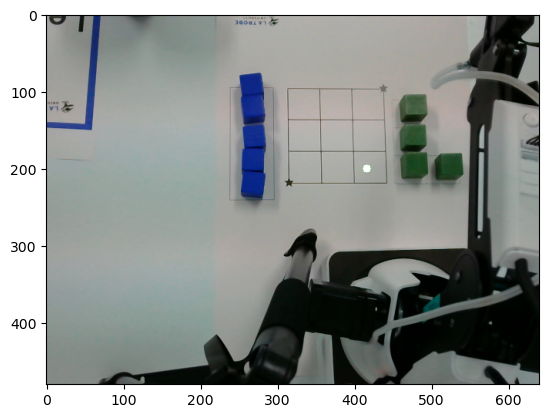

2


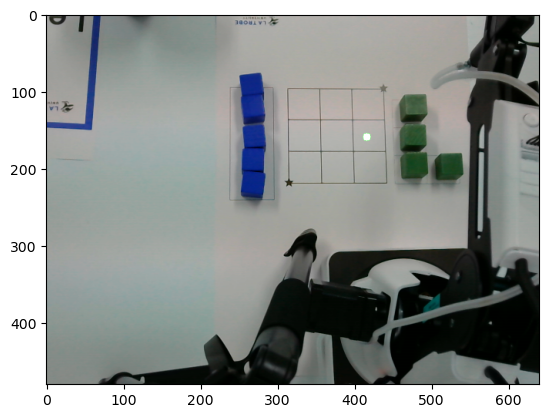

3


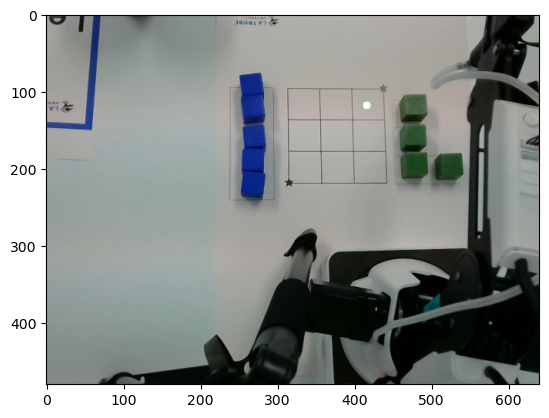

4


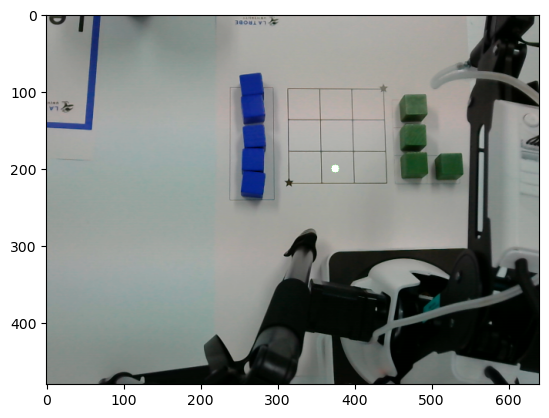

5


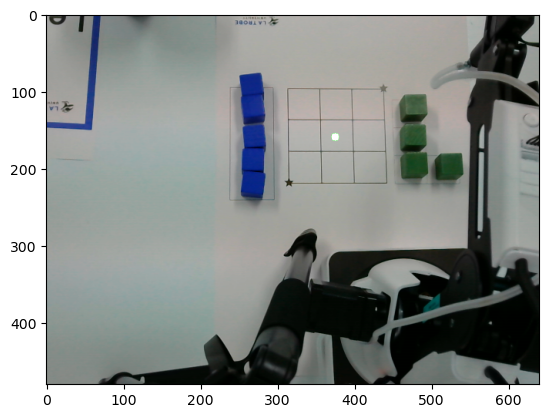

6


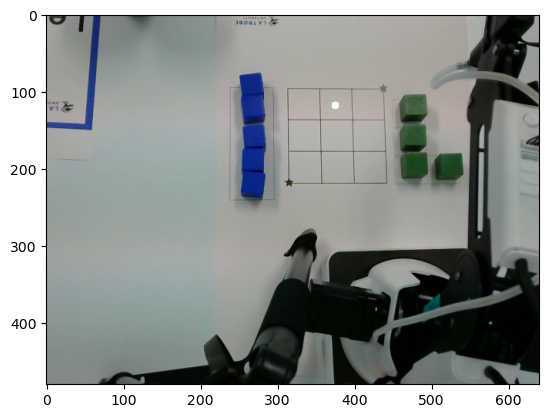

7


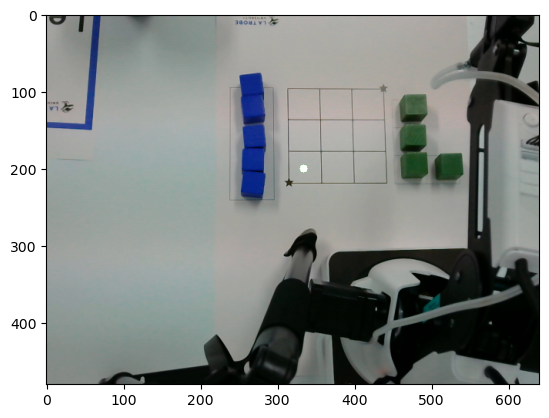

8


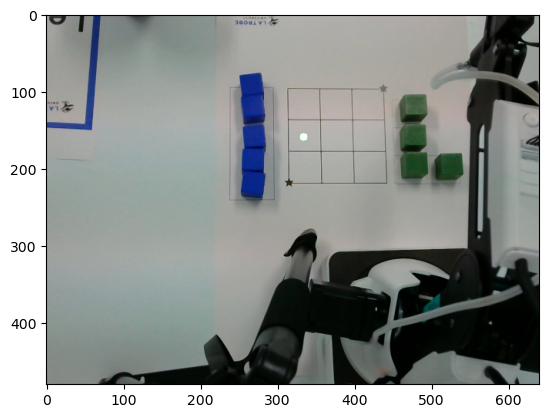

9


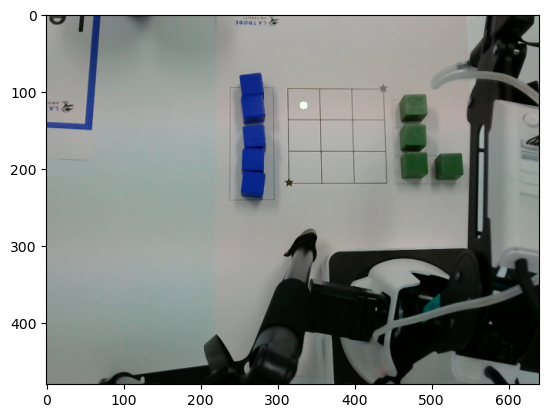

In [38]:

for idx in range(1,10):
    print(idx)
    img = draw_circle(img_with_circles, pos_cord[idx][0], pos_cord[idx][1])
    plt.imshow(img, cmap='gray')
    plt.show()

In [22]:
CON_STR = {
    dType.DobotConnect.DobotConnect_NoError:  "DobotConnect_NoError",
    dType.DobotConnect.DobotConnect_NotFound: "DobotConnect_NotFound",
    dType.DobotConnect.DobotConnect_Occupied: "DobotConnect_Occupied"}

In [23]:
#Load Dll and get the CDLL object
api = dType.load()
#建立与dobot的连接
#Connect Dobot
state = dType.ConnectDobot(api, "", 115200)[0]
print("Connect status:",CON_STR[state])

if (CON_STR[state] == "DobotConnect_NoError"):
    dType.SetQueuedCmdClear(api)
else:
    assert False

您用的dll是64位，为了顺利运行，请保证您的python环境也是64位
python环境是： ('64bit', 'WindowsPE')
Connect status: DobotConnect_NoError


In [39]:
pickupLoc = {}
refLoc = {}
homeLoc = None
globZ = None

rob_cord = {}

In [40]:
locList = ["Z", "Pickup Loc 1", "Pickup Loc 2", "Pickup Loc 3", "Pickup Loc 4", "Home", "Ref 1", "Ref 2"]

last_print = None
def print_once(str):
    global last_print
    if last_print == str:
        return
    print(str)
    last_print = str
    
def setCoordinates(locList = locList):
    global pickupLoc, refLoc, homeLoc, globZ
    prev_pose = dType.GetPose(api)
    allLoc = []
    cnt = 0
    while(True):
        time.sleep(0.5)
        pose = dType.GetPose(api)
        print_once(f"Set : {locList[cnt]}")
        if prev_pose == pose:
            continue
        prev_pose = pose
        allLoc.append(pose)
        print(f"Location set: {locList[cnt]}")
        cnt += 1
        if len(allLoc) == len(locList):
            break


    globZ = allLoc[0][2]
    pickupLoc[1] = (allLoc[1][0], allLoc[1][1], globZ) 
    pickupLoc[2] = (allLoc[2][0], allLoc[2][1], globZ) 
    pickupLoc[3] = (allLoc[3][0], allLoc[3][1], globZ)
    pickupLoc[4] = (allLoc[4][0], allLoc[4][1], globZ)
    
    homeLoc = (allLoc[5][0], allLoc[5][1], allLoc[5][2]) 
    refLoc[1] = (allLoc[6][0], allLoc[6][1]) 
    refLoc[2] = (allLoc[7][0], allLoc[7][1])

def setCoordinatesHome():
    global homeLoc
    prev_pose = dType.GetPose(api)
    while(True):
        time.sleep(0.5)
        pose = dType.GetPose(api)
        if prev_pose == pose:
            continue
        prev_pose = pose
        homeLoc = (pose[0], pose[1], pose[2])
        print(f"Location set: Home")
        break

def setCoordinatesZ():
    global globZ
    prev_pose = dType.GetPose(api)
    while(True):
        time.sleep(0.5)
        pose = dType.GetPose(api)
        if prev_pose == pose:
            continue
        prev_pose = pose
        globZ = pose[2]
        print(f"Location set: Z")
        break

def setCoordinatesRef():
    global refLoc
    if globZ == None:
        print("Set Z first")
        return 
        
    prev_pose = dType.GetPose(api)
    while(True):
        time.sleep(0.5)
        pose = dType.GetPose(api)
        if prev_pose == pose:
            continue
        prev_pose = pose
        refLoc[1] = (pose[0], pose[1], globZ)
        print(f"Location set: Ref 1")
        break

    while(True):
        time.sleep(0.5)
        pose = dType.GetPose(api)
        if prev_pose == pose:
            continue
        prev_pose = pose
        refLoc[2] = (pose[0], pose[1], globZ)
        print(f"Location set: Ref 2")
        break

def setCoordinatesPickup():
    global pickupLoc
    if globZ == None:
        print("Set Z first")
        return 
        
    prev_pose = dType.GetPose(api)
    while(True):
        time.sleep(0.5)
        pose = dType.GetPose(api)
        if prev_pose == pose:
            continue
        prev_pose = pose
        pickupLoc[1] = (pose[0], pose[1], globZ)
        print(f"Location set: pickupLoc 1")
        break

    while(True):
        time.sleep(0.5)
        pose = dType.GetPose(api)
        if prev_pose == pose:
            continue
        prev_pose = pose
        pickupLoc[2] = (pose[0], pose[1], globZ)
        print(f"Location set: pickupLoc 2")
        break

    while(True):
        time.sleep(0.5)
        pose = dType.GetPose(api)
        if prev_pose == pose:
            continue
        prev_pose = pose
        pickupLoc[3] = (pose[0], pose[1], globZ)
        print(f"Location set: pickupLoc 3")
        break

    while(True):
        time.sleep(0.5)
        pose = dType.GetPose(api)
        if prev_pose == pose:
            continue
        prev_pose = pose
        pickupLoc[4] = (pose[0], pose[1], globZ)
        print(f"Location set: pickupLoc 4")
        break
        
def pick(location):
    x = location[0]
    y = location[1]

    current_pose = dType.GetPose(api)
    dType.SetPTPCmdEx(api, 2, x,  y,  globZ+30, current_pose[3], 1)
    current_pose = dType.GetPose(api)
    dType.SetPTPCmdEx(api, 2, x,  y,  globZ-5, current_pose[3], 1)
    dType.SetEndEffectorSuctionCupEx(api, 1, 1)
    dType.dSleep(1000)
    current_pose = dType.GetPose(api)
    dType.SetPTPCmdEx(api, 2, homeLoc[0],  homeLoc[1],  homeLoc[2], current_pose[3], 1)

def drop(location):
    x = location[0]
    y = location[1]

    current_pose = dType.GetPose(api)
    dType.SetPTPCmdEx(api, 2, x,  y,  globZ+30, current_pose[3], 1)
    current_pose = dType.GetPose(api)
    dType.SetPTPCmdEx(api, 2, x,  y,  globZ+5, current_pose[3], 1)
    dType.SetEndEffectorSuctionCupEx(api, 0, 1)
    dType.dSleep(1000)
    current_pose = dType.GetPose(api)
    dType.SetPTPCmdEx(api, 2, homeLoc[0],  homeLoc[1],  homeLoc[2], current_pose[3], 1)

def playPiece(iteration, location):
    pickupLocation = pickupLoc[iteration]
    pick(pickupLocation)

    finalPosition = rob_cord[location]
    drop(finalPosition)

def goto(location):
    x = location[0]
    y = location[1]

    current_pose = dType.GetPose(api)
    dType.SetPTPCmdEx(api, 2, x,  y,  globZ+30, current_pose[3], 1)

In [41]:
def get_transformation_matrix(r1, r2, i1, i2):
    x_r1 = r1[0]
    y_r1 = r1[1]

'''
Based on the robot coordinate system
'''
def setCoordinatesOfCells():

    x1, y1 = refLoc[1][0], refLoc[1][1]
    x2, y2 = refLoc[2][0], refLoc[2][1]

    middle_x, middle_y = (x1 + x2) / 2, (y1 + y2) / 2

    size_x = abs(x1 - x2) / 3
    size_y = abs(y1 - y2) / 3

    rob_cord[1] = ( middle_x - size_x, middle_y - size_y )
    rob_cord[2] = ( middle_x,          middle_y - size_y )
    rob_cord[3] = ( middle_x + size_x, middle_y - size_y )
    rob_cord[4] = ( middle_x - size_x, middle_y )
    rob_cord[5] = ( middle_x,          middle_y )
    rob_cord[6] = ( middle_x + size_x, middle_y )
    rob_cord[7] = ( middle_x - size_x, middle_y + size_y )
    rob_cord[8] = ( middle_x,          middle_y + size_y)
    rob_cord[9] = ( middle_x + size_x, middle_y + size_y)

    # # Assuming normal XY
    # rob_cord[1] = ( middle_x - size_x, middle_y + size_y )
    # rob_cord[2] = ( middle_x         , middle_y + size_y)
    # rob_cord[3] = ( middle_x + size_x, middle_y + size_y )
    # rob_cord[4] = ( middle_x - size_x, middle_y )
    # rob_cord[5] = ( middle_x,          middle_y )
    # rob_cord[6] = ( middle_x + size_x, middle_y )
    # rob_cord[7] = ( middle_x - size_x, middle_y - size_y )
    # rob_cord[8] = ( middle_x,          middle_y - size_y)
    # rob_cord[9] = ( middle_x + size_x, middle_y - size_y)

        

In [42]:
setCoordinates()

Set : Z
Location set: Z
Set : Pickup Loc 1
Location set: Pickup Loc 1
Set : Pickup Loc 2
Location set: Pickup Loc 2
Set : Pickup Loc 3
Location set: Pickup Loc 3
Set : Pickup Loc 4
Location set: Pickup Loc 4
Set : Home
Location set: Home
Set : Ref 1
Location set: Ref 1
Set : Ref 2
Location set: Ref 2


In [43]:
setCoordinatesOfCells()

In [44]:
rob_cord

{1: (193.0353571573893, 20.923755437135696),
 2: (227.59139251708984, 20.923755437135696),
 3: (262.14742787679035, 20.923755437135696),
 4: (193.0353571573893, 61.48032137751579),
 5: (227.59139251708984, 61.48032137751579),
 6: (262.14742787679035, 61.48032137751579),
 7: (193.0353571573893, 102.03688731789589),
 8: (227.59139251708984, 102.03688731789589),
 9: (262.14742787679035, 102.03688731789589)}

In [45]:
refLoc

{1: (175.75733947753906, 122.31517028808594),
 2: (279.4254455566406, 0.6454724669456482)}

In [46]:
for i in range(1,10):
    goto(rob_cord[i])
    dType.dSleep(500)

In [ ]:
setCoordinatesRef()

In [51]:
def identifyColor(image, coordinates, radius=5):

    # Convert the image from BGR to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Get the coordinates
    x, y = coordinates
    x = int(x)
    y = int(y)
    # Extract the region of interest (ROI) around the coordinates
    roi = hsv_image[y-radius:y+radius+1, x-radius:x+radius+1]

    # Calculate the mean HSV value of the ROI
    mean_hsv = np.mean(roi, axis=(0, 1))

    # Define HSV ranges for red, green, and blue
    red_lower1 = np.array([0, 70, 50])
    red_upper1 = np.array([10, 255, 255])
    red_lower2 = np.array([170, 70, 50])
    red_upper2 = np.array([180, 255, 255])
    green_lower = np.array([35, 50, 50])
    green_upper = np.array([85, 255, 255])
    blue_lower = np.array([100, 150, 0])
    blue_upper = np.array([140, 255, 255])

    # Check the color
    if ((red_lower1 <= mean_hsv).all() and (mean_hsv <= red_upper1).all()) or \
       ((red_lower2 <= mean_hsv).all() and (mean_hsv <= red_upper2).all()):
        color = "red"
    elif (green_lower <= mean_hsv).all() and (mean_hsv <= green_upper).all():
        color = "green"
    elif (blue_lower <= mean_hsv).all() and (mean_hsv <= blue_upper).all():
        color = "blue"
    else:
        color = "unknown"

    return color

checker = {}
checker["red"] = 'X'
checker["green"] = 'O'
checker["unknown"] = ' '

def readBoard(image):
    board = np.array([[' ',' ',' '],[' ',' ',' '],[' ',' ',' ']])
    for x_pos in range(3):
        for y_pos in range(3):
            idx = x_pos  + y_pos*3
            pixel_pos = pos_cord[idx+1]
            color = identifyColor(image, pixel_pos)
            # print(x_pos, y_pos, color)
            board[x_pos, y_pos] = checker[color]
    return board
    
def print_board(board):
    board_1_based = np.pad(board, ((1, 0), (1, 0)), mode='constant', constant_values=' ')
    for row in board_1_based:
        print(" | ".join(row))
    print("")

def wasUserMovedBeforeHome(currPlayBoard):
    count = 0
    ret, frame = cap.read()
    prev_board = readBoard(frame)
    while(True):
        time.sleep(0.1)
        ret, frame = cap.read()
        curr = readBoard(frame)
        if (prev_board == curr).all():
            count += 1
        else:
            count = 0
        prev_board = curr

        if count >= 5:
            break;

    if (currPlayBoard == curr).all():
        ## No Move
        return False, curr
    else:
        return True, curr
    
def waitforBoardChange():
    ret, frame = cap.read()
    prev_board = readBoard(frame)
    count = 0
    while(True):
        ret, frame = cap.read()
        curr = readBoard(frame)
        if (prev_board == curr).all():
            time.sleep(1)
            continue
        else:
            if (last_board == curr).all():
                count += 1
            else:
                count = 0
            time.sleep(0.2)
            if count >= 10:
                return curr, prev_board
        last_board = curr
        
def userMove(prev_board, curr_board):
    for x in range(3):
        for y in range(3):
            if prev_board[x][y] != curr_board[x][y]:
                return x,y

def aiMove(ai_move, ai_move_count):
    x = ai_move[0]
    y = ai_move[1]

    pos_idx = (x+1) + (y*3)
    
    playPiece(ai_move_count, pos_idx)
    

In [52]:
# waitforBoardChange()

In [53]:
# Function to print the board with 1-based indexing

# Function to check for a win
def check_winner(board):
    # Check rows for a win
    for row in board:
        if np.all(row == 'O'):
            return 'O'
        if np.all(row == 'X'):
            return 'X'
    
    # Check columns for a win
    for col in range(board.shape[1]):
        if np.all(board[:, col] == 'O'):
            return 'O'
        if np.all(board[:, col] == 'X'):
            return 'X'
    
    # Check diagonals for a win
    if np.all(np.diag(board) == 'O'):
        return 'O'
    if np.all(np.diag(board) == 'X'):
        return 'X'
    
    if np.all(np.diag(np.fliplr(board)) == 'O'):
        return 'O'
    if np.all(np.diag(np.fliplr(board)) == 'X'):
        return 'X'
    
    # Check for a draw
    # if not np.any(board == ''):
    #     return 'Draw'
    
    # No winner or draw
    return 'No Winner'

def check_winner_wrapper(board):
    winner = check_winner(board)
    if winner == 'X':
        print("You WON!!!")
    elif winner == 'O':
        print("AI wins")
    else:
        print("It's a draw")

# Function to check for a win
def check_win(board, mark):
    # Check rows, columns, and diagonals
    for i in range(3):
        if all([board[i][j] == mark for j in range(3)]) or all([board[j][i] == mark for j in range(3)]):
            return True
    if all([board[i][i] == mark for i in range(3)]) or all([board[i][2-i] == mark for i in range(3)]):
        return True
    return False

# Function to check for a draw
def check_draw(board):
    return all([cell != ' ' for row in board for cell in row])

# Function to get the best move for the AI using minimax algorithm
def minimax(board, depth, is_maximizing):
    if check_win(board, 'O'):
        return 1
    if check_win(board, 'X'):
        return -1
    if check_draw(board):
        return 0
    
    if is_maximizing:
        best_score = -float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'O'
                    score = minimax(board, depth + 1, False)
                    board[i][j] = ' '
                    best_score = max(score, best_score)
        return best_score
    else:
        best_score = float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'X'
                    score = minimax(board, depth + 1, True)
                    board[i][j] = ' '
                    best_score = min(score, best_score)
        return best_score

# Function to find the best move
def find_best_move(board):
    best_score = -float('inf')
    best_move = None
    for i in range(3):
        for j in range(3):
            if board[i][j] == ' ':
                board[i][j] = 'O'
                score = minimax(board, 0, False)
                board[i][j] = ' '
                if score > best_score:
                    best_score = score
                    best_move = (i, j)
    return best_move

# Function to play the game
def play_game():
    board = np.array([[' ' for _ in range(3)] for _ in range(3)])
    print("Tic Tac Toe Game")
    print_board(board)
    ai_move_count = 0
    user_move_count = 0
    while True:
        # Player's move
        didUserPlayBeforeHome, currBoard = wasUserMovedBeforeHome(board)

        if didUserPlayBeforeHome == False:
            curr_board, prev_board = waitforBoardChange()
            row, col = userMove(prev_board, curr_board)
        else:
            row, col = userMove(board, curr_board)
        
        if board[row][col] != ' ':
            print("Invalid move! Try again.")
            continue
        board[row][col] = 'X'
        user_move_count += 1
        print_board(board)
        
        if check_win(board, 'X'):
            print_board(board)
            print("You win!")
            break
        if check_win(board, 'O'):
            print_board(board)
            print("AI win!")
            break
        if check_draw(board):
            print_board(board)
            print("It's a draw!")
            break
        
        # AI's move
        ai_move = find_best_move(board)
        board[ai_move[0]][ai_move[1]] = 'O'
        ai_move_count += 1
        aiMove(ai_move, ai_move_count)

        print_board(board)
        
        # if (user_move_count == 3 and ai_move_count == 3):
        #     check_winner_wrapper(board)
        #     break
        
        

In [101]:
play_game()

Tic Tac Toe Game
  |   |   |  
  |   |   |  
  |   |   |  
  |   |   |  

  |   |   |  
  |   |   |  
  |   |   |  
  |   |   | X

  |   |   |  
  |   |   |  
  |   | O |  
  |   |   | X

  |   |   |  
  |   |   |  
  |   | O |  
  | X |   | X

  |   |   |  
  |   |   |  
  |   | O |  
  | X | O | X

  |   |   |  
  |   | X |  
  |   | O |  
  | X | O | X

  |   |   |  
  | O | X |  
  |   | O |  
  | X | O | X

  |   |   |  
  | O | X | X
  |   | O |  
  | X | O | X

  |   |   |  
  | O | X | X
  |   | O | O
  | X | O | X

  |   |   |  
  | O | X | X
  | X | O | O
  | X | O | X

  |   |   |  
  | O | X | X
  | X | O | O
  | X | O | X

It's a draw!


In [ ]:
setCoordinates()

In [ ]:
setCoordinatesZ()

In [ ]:
setCoordinatesRef()
setCoordinatesOfCells()

In [ ]:
setCoordinatesPickup()

In [ ]:
setCoordinatesHome()

In [84]:
lst = []

In [87]:
lst.append(1)
lst.append(2)
lst.append(1)
lst.append("serer")

In [88]:
print(lst)

[1, 2, 1, 2, 1, 2, 1, 'serer']
